# Anomaly Detection Execution File

## Importing Class and Module

In [1]:
import numpy as np
import gdown
from matplotlib import pyplot as plt
import functions.AD_preprocessing as preprocessing
import functions.AD_utilities as utilities
import functions.AD_detection as detection
import functions.AD_training as training

In [2]:
from AD_QAOA import AD_QAOA 

## Artificial Dataset

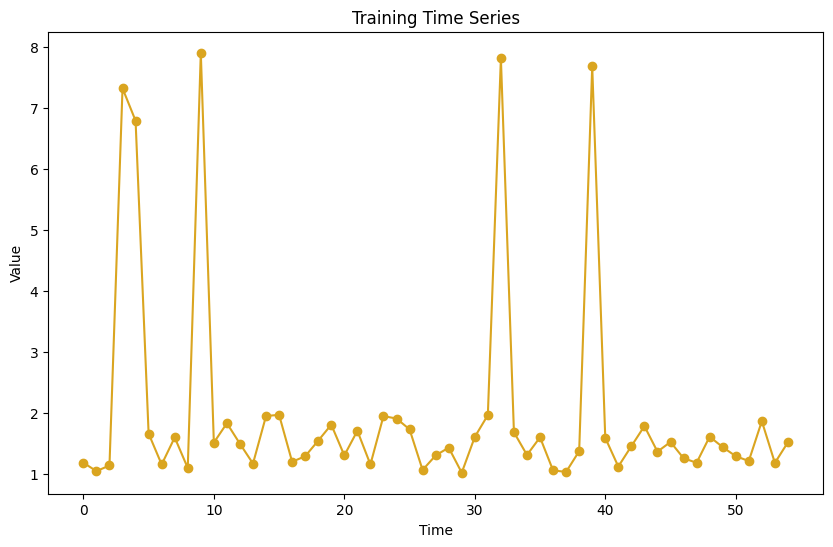

In [3]:
seed = 42
np.random.seed(seed)

dataset_train, _ = preprocessing.generate_dataset(
    normal_sample_type='uniform',
    normal_sample_params={'low': 1, 'high': 2, 'size': 50},
    outlier_sample_type='uniform',
    outlier_sample_params={'low': 5, 'high': 8, 'size': 5}
)

utilities.plot_training_time_series(dataset_train)

# print("Train Dataset:", dataset_train)

Selected overlap: 2
Possible batch sizes: [7, 8, 9]
Best batch size for balanced batches: 9


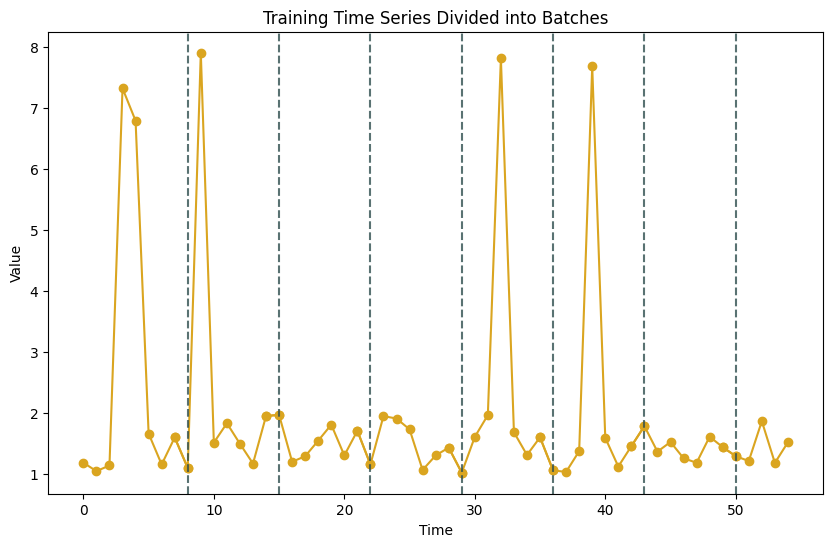

In [4]:
overlap = 2
print("Selected overlap:", overlap)

batch_size = [7, 8, 9]
print("Possible batch sizes:", batch_size)

batches, best_batch_size = preprocessing.split_dataset_with_best_batch_size(dataset_train, overlap, batch_size)
print("Best batch size for balanced batches:", best_batch_size)

utilities.plot_training_time_series_batches(dataset_train, overlap=overlap, batch_sizes=batch_size)

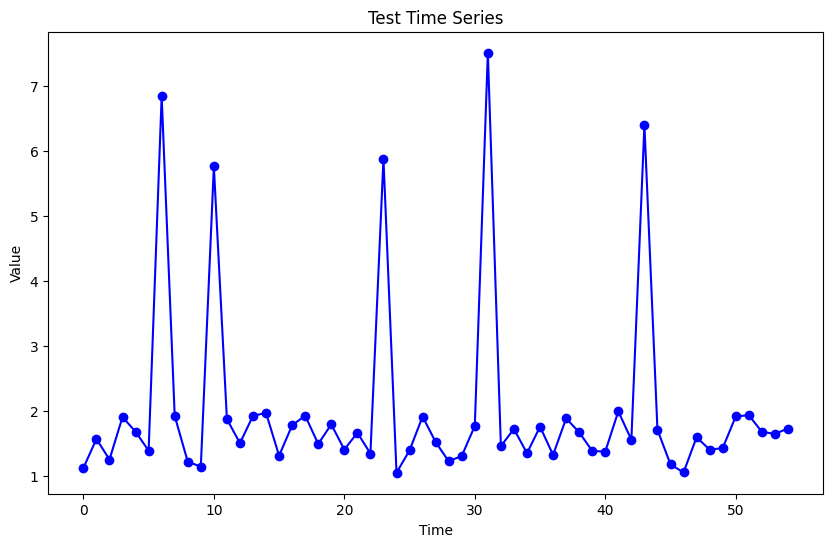

In [5]:
seed = 50
np.random.seed(seed)

dataset_test, _ = preprocessing.generate_dataset(
    normal_sample_type='uniform',
    normal_sample_params={'low': 1, 'high': 2, 'size': 50},
    outlier_sample_type='uniform',
    outlier_sample_params={'low': 5, 'high': 8, 'size': 5}
)

utilities.plot_test_time_series(dataset_test)

# print("Test Dataset:", dataset_test)

In [6]:
model_name = 'cubic'
model_params = {}

alpha_range = np.linspace(-1, 0, 10)

print("Initializing Batched grid_search...")
alpha_mean, beta_mean, alpha_values, beta_values, normalized_rank_values = utilities.execute_batch_processing(
    batches=batches, 
    alpha_range=alpha_range, 
    selected_position=1
)

print(f"\nMean Alpha: {alpha_mean}, Mean beta: {beta_mean}")

Initializing Batched grid_search...

Processing batch 1/8...
Batch 1 completed in 10.53 seconds.
Batch 1 results: {'alpha': -1.0, 'beta': 0.0, 'qaoa_state': array([1, 1, 1, 1, 0, 1, 0, 1, 1]), 'qaoa_cost': -5.182880990899487, 'classical_cost': -5.6365059083278855, 'approx_ratio': 0.9195201912663354, 'string_rank': 7}

Processing batch 2/8...
Batch 2 completed in 12.71 seconds.
Batch 2 results: {'alpha': -0.8888888888888888, 'beta': 0.11111111111111116, 'qaoa_state': array([1, 0, 0, 1, 1, 1, 1, 1, 1]), 'qaoa_cost': -3.33287235755137, 'classical_cost': -3.585993201065226, 'approx_ratio': 0.9294140202388933, 'string_rank': 7}

Processing batch 3/8...
Batch 3 completed in 12.01 seconds.
Batch 3 results: {'alpha': -0.6666666666666667, 'beta': 0.33333333333333326, 'qaoa_state': array([1, 1, 0, 1, 1, 1, 1, 1, 1]), 'qaoa_cost': -10.639494157434157, 'classical_cost': -12.11071902036334, 'approx_ratio': 0.8785187848503941, 'string_rank': 8}

Processing batch 4/8...
Batch 4 completed in 12.49 sec

In [7]:
unique_centers_with_radii = utilities.execute_qaoa_on_batches(
    batches=batches, 
    model_name=model_name, 
    model_params=model_params, 
    alpha_mean=alpha_mean, 
    beta_mean=beta_mean
)


Initializing the final run...

Executing QAOA model on batch 1/8...
QAOA solution for batch 1: [[1, 1, 1, 0, 0, 0, 1, 1, 1], [1, 1, 0, 0, 0, 0, 1, 1, 1], [1, 0, 1, 0, 0, 0, 1, 1, 1], [1, 0, 0, 0, 0, 0, 1, 1, 1], [0, 1, 1, 0, 0, 0, 1, 1, 1]]
Batch 1 - QAOA cost: -3.296117775692845, Classical optimal solution: -3.5160094282376786, Approximation ratio: 0.9374598797207863
Radius: 3.210611523085219
Radius adjusted check_ok
Batch 1 completed. Saved centers with radii: [((0, 1.1848544555255272), 3.210611523085219), ((1, 1.0464504127199978), 3.210611523085219), ((2, 1.139493860652042), 3.210611523085219), ((6, 1.1559945203362028), 3.210611523085219), ((7, 1.5986584841970366), 3.210611523085219), ((8, 1.0976721140063839), 3.210611523085219)]

Executing QAOA model on batch 2/8...
QAOA solution for batch 2: [[1, 0, 0, 0, 1, 1, 1, 1, 1], [1, 0, 0, 0, 1, 1, 1, 0, 1], [1, 0, 0, 1, 1, 1, 1, 1, 1], [1, 0, 0, 1, 1, 1, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1, 1, 1]]
Batch 2 - QAOA cost: -7.429994154339278, Clas

Anomalies detected: 5
Anomalies: [(6, 6.850194244167543), (10, 5.76601674303369), (23, 5.884788636581085), (31, 7.516987666112534), (43, 6.403538686943854)]


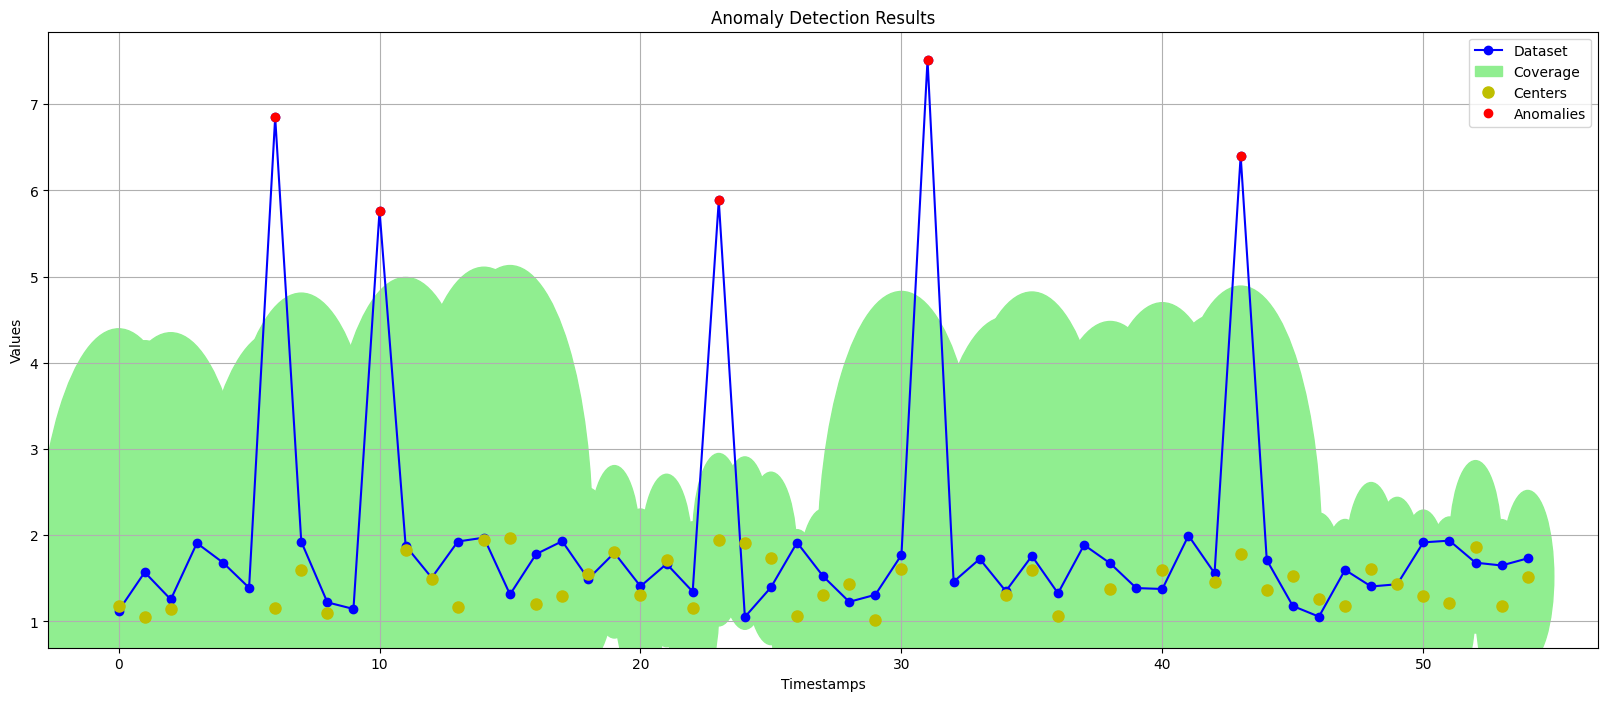

In [10]:
anomalies = detection.apply_circles_to_new_dataset(dataset_test, unique_centers_with_radii)

detection.plot_anomaly_detection_results_coverage(dataset_test, unique_centers_with_radii, anomalies, title="Anomaly Detection Results")

# detection.plot_anomaly_detection_results(dataset_test, unique_centers_with_radii, anomalies, title="Anomaly Detection Results")

## Real-world Dataset

Loading the dataset from: new_dataset.csv


Downloading...
From: https://drive.google.com/uc?id=17n3TwoVkNSecnpWk9jwMIOVW0uQWGi-7
To: C:\Users\marco\Desktop\Dottorato\Tesi\codice\new_dataset.csv
100%|██████████| 105k/105k [00:00<00:00, 7.05MB/s]


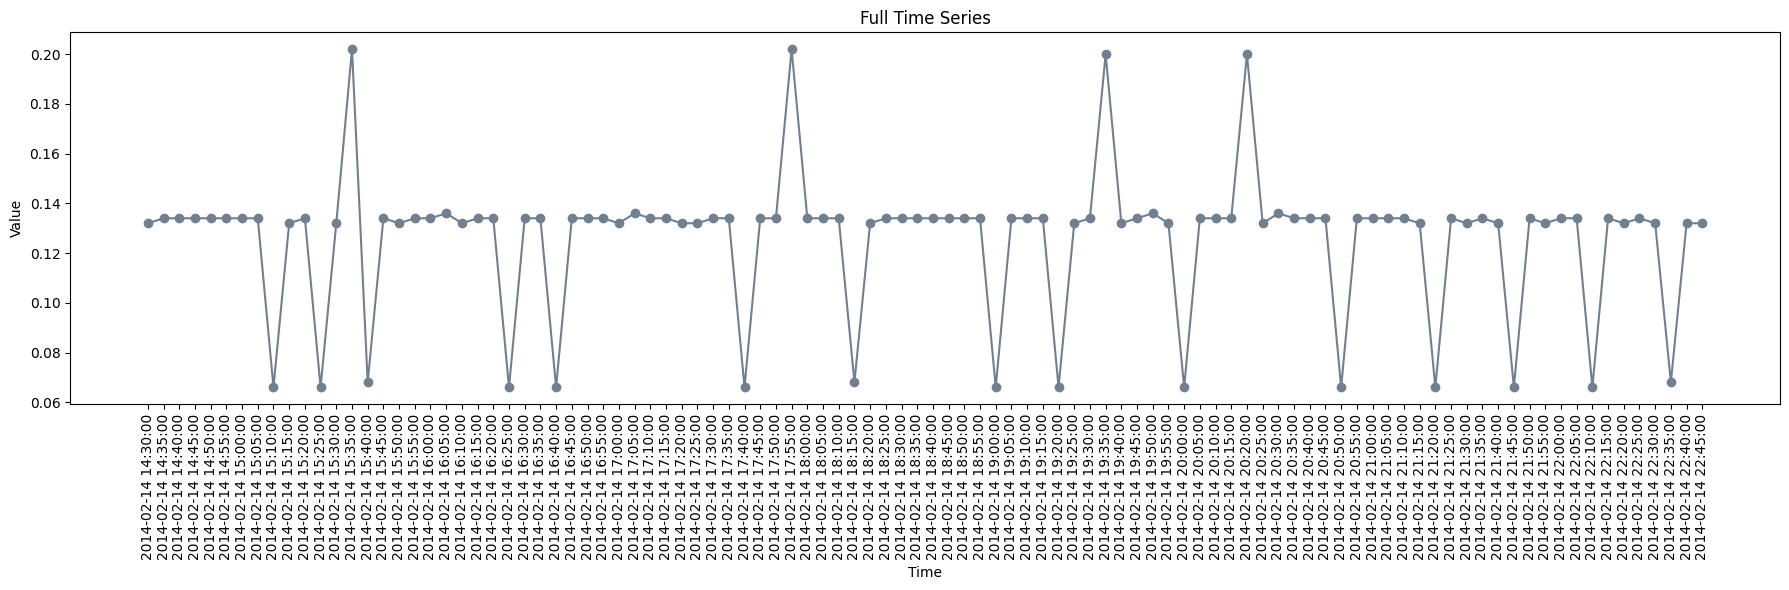

In [3]:
file_id = '17n3TwoVkNSecnpWk9jwMIOVW0uQWGi-7' #dataset temperature esterne (in realta cpu??) ok
# file_id = '1vg1hKPytYlOol7LHbVZA9dsWKpQ2N0u0' #dataset cpu utilization 5f5533  ok
# file_id = '1Wh7iYN2fpxj8UCPoch4veHdDdX0YUIP3' #dataset rds cpu utilization e47b
# file_id = '1dA7rxO1O2EXjSxzw3amUJyrC04cR741K'  # dataset ambient system failure t



# url = f'https://drive.google.com/uc?id={file_id}' #dataset temperature esterne (in realta cpu??)
# url = f'https://drive.google.com/uc?id={file_id}' #dataset cpu utilization 5f5533
url = f'https://drive.google.com/uc?id={file_id}' #dataset rds cpu utilization e47b

print(f"Downloading the file from: {url}")


# output = 'ec2_cpu_utilization_24ae8d.csv' #dataset temperature esterne (in realta cpu??)
# output = 'ec2_cpu_utilization_new.csv' #dataset cpu utilization 5f5533
output = 'new_dataset.csv' #dataset rds cpu utilization e47b

print(f"Loading the dataset from: {output}")

gdown.download(url, output, quiet=False)

dataset, original_times = preprocessing.load_dataset_from_csv(output, 'timestamp', 'value')

first_100_elements = dataset[:100]
first_100_timestamps = original_times[:100]

times = np.array([t for t in first_100_timestamps])
values = np.array([v for _, v in first_100_elements])

plt.figure(figsize=(18, 6))
plt.plot(times, values, marker='o', color='slategray', linestyle='-', label='Time Series')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Full Time Series')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Loading training set from: new_dataset.csv


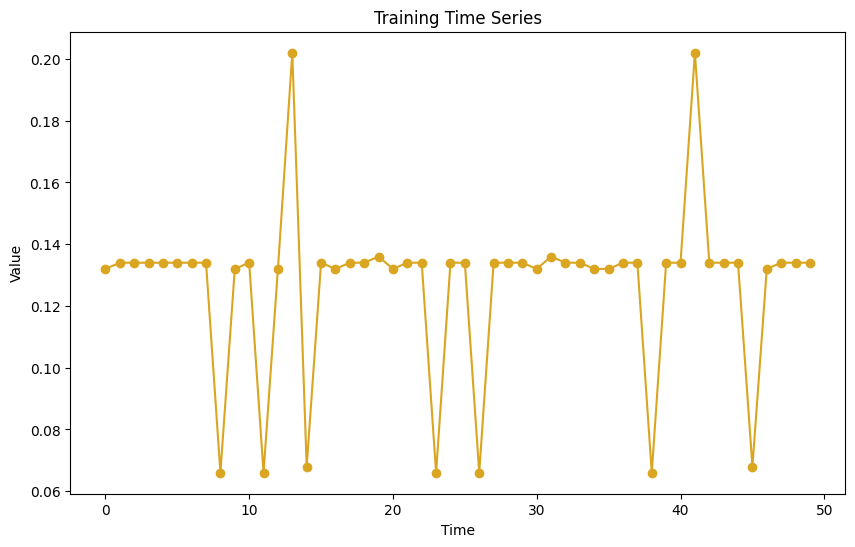

In [4]:
print(f"Loading training set from: {output}")
dataset_train, train_times = preprocessing.load_partial_dataset_from_csv(output, 'timestamp', 'value', 0, 50)

utilities.plot_training_time_series(dataset_train)


Scaling the dataset...


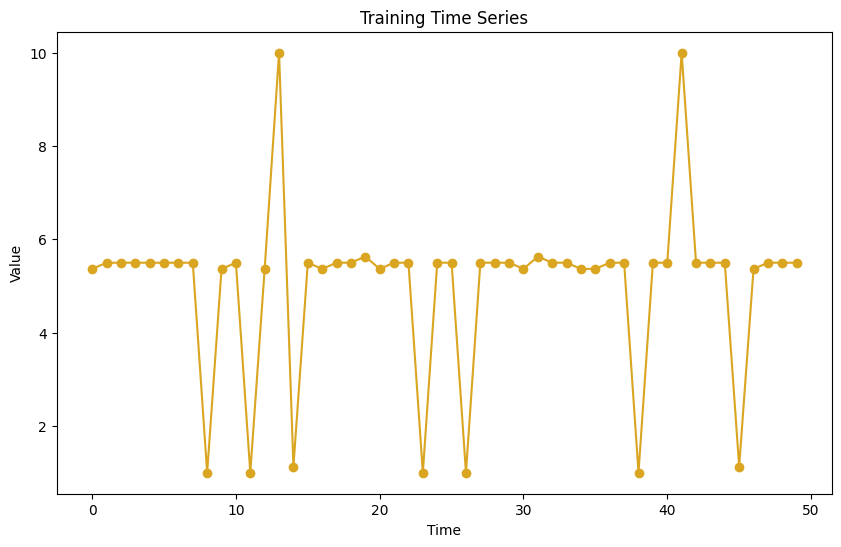

In [5]:
print("\nScaling the dataset...")
dataset_train_scaled = preprocessing.scale_dataset(dataset_train)

utilities.plot_training_time_series(dataset_train_scaled)

# print("Training Dataset:", dataset_test)

Selected overlap: 2
Possible batch sizes: [7, 8, 9]
Best batch size for balanced batches: 7


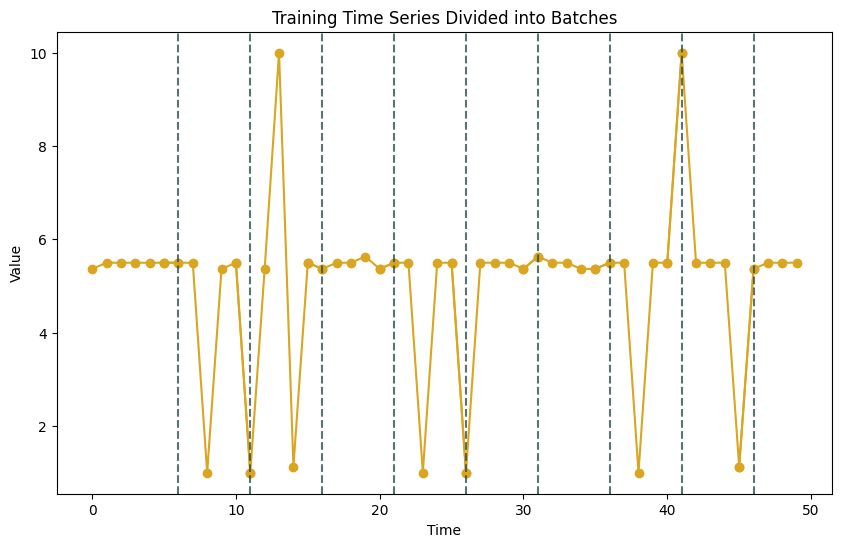

In [6]:
overlap = 2
print("Selected overlap:", overlap)

batch_size = [7, 8, 9]
print("Possible batch sizes:", batch_size)

batches, best_batch_size = preprocessing.split_dataset_with_best_batch_size(dataset_train_scaled, overlap, batch_size)
print("Best batch size for balanced batches:", best_batch_size)

utilities.plot_training_time_series_batches(dataset_train_scaled, overlap=overlap, batch_sizes=batch_size)

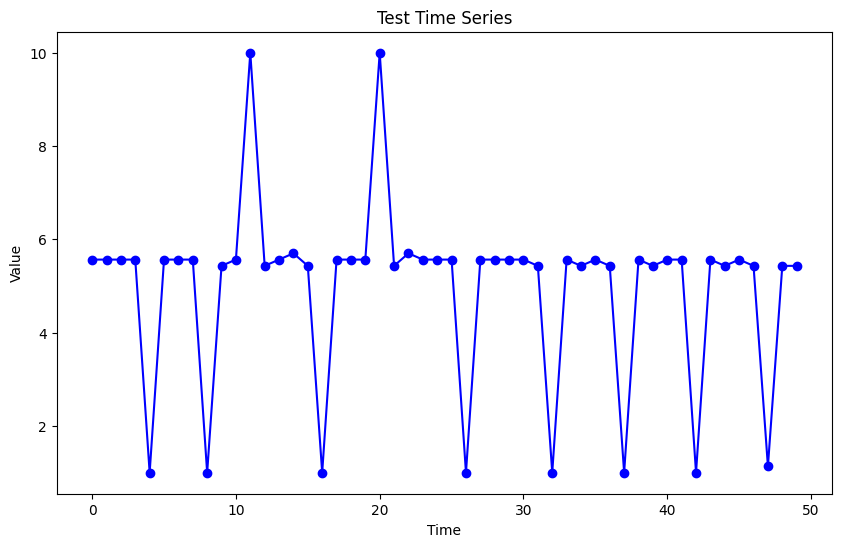

In [8]:
dataset_test, test_times = preprocessing.load_partial_dataset_from_csv(output, 'timestamp', 'value', 50, 100)

dataset_test_scaled = preprocessing.scale_dataset(dataset_test)

utilities.plot_test_time_series(dataset_test_scaled)

# print("Test Dataset:", dataset_test)

In [9]:
model_name = 'quadratic'
model_params = {}

alpha_range = np.linspace(-1, 0, 10)

print("Initializing Batched grid_search...")
alpha_mean, beta_mean, alpha_values, beta_values, normalized_rank_values = utilities.execute_batch_processing(
        batches=batches, 
        alpha_range=alpha_range, 
        selected_position=1
    )

print(f"\nMean Alpha: {alpha_mean}, Mean beta: {beta_mean}")

Initializing Batched grid_search...

Processing batch 1/10...

Processing batch 2/10...
Batch 2 results: {'alpha': -0.8888888888888888, 'beta': 0.11111111111111116, 'qaoa_state': array([1, 1, 1, 0, 1, 1, 0]), 'qaoa_cost': -7.413644702810919, 'classical_cost': -7.413644702810919, 'approx_ratio': 1.0, 'string_rank': 5}
Batch 2 completed in 3.30 seconds.

Processing batch 3/10...
Batch 3 results: {'alpha': -0.8888888888888888, 'beta': 0.11111111111111116, 'qaoa_state': array([1, 0, 1, 0, 0, 1, 1]), 'qaoa_cost': -3.554718777505548, 'classical_cost': -3.554718777505548, 'approx_ratio': 1.0, 'string_rank': 4}
Batch 3 completed in 3.67 seconds.

Processing batch 4/10...
Batch 4 results: {'alpha': -0.11111111111111116, 'beta': 0.8888888888888888, 'qaoa_state': array([1, 1, 1, 1, 0, 0, 1]), 'qaoa_cost': -20849998274871.824, 'classical_cost': -20849998274872.23, 'approx_ratio': 0.9999999999999806, 'string_rank': 5}
Batch 4 completed in 3.45 seconds.

Processing batch 5/10...
Batch 5 results: {'a

In [10]:
unique_centers_with_radii = utilities.execute_qaoa_on_batches(
    batches=batches, 
    model_name=model_name, 
    model_params=model_params, 
    alpha_mean=alpha_mean, 
    beta_mean=beta_mean
)


Initializing the final run...

Executing QAOA model on batch 1/10...
QAOA solution for batch 1: [[1, 1, 1, 1, 1, 1, 1], [1, 0, 1, 1, 1, 1, 1], [0, 1, 1, 1, 1, 1, 1], [0, 0, 1, 1, 1, 1, 1], [1, 1, 1, 1, 0, 1, 1]]
Batch 1 - QAOA cost: -167.14805131928978, Classical optimal solution: -167.14805131928978, Approximation ratio: 1.0
Radius: 1
No adjustment
Batch 1 completed. Saved centers with radii: [((0, 5.367647058823533), 1), ((1, 5.500000000000004), 1), ((2, 5.500000000000004), 1), ((3, 5.500000000000004), 1), ((4, 5.500000000000004), 1), ((5, 5.500000000000004), 1), ((6, 5.500000000000004), 1)]

Executing QAOA model on batch 2/10...
QAOA solution for batch 2: [[1, 1, 1, 0, 1, 1, 0], [1, 1, 1, 0, 0, 1, 0], [1, 1, 1, 0, 1, 0, 0], [1, 1, 1, 0, 0, 0, 0], [1, 1, 0, 0, 1, 1, 0]]
Batch 2 - QAOA cost: -5.883893494215156, Classical optimal solution: -5.930700159268011, Approximation ratio: 0.9921077336914919
Radius: 2.0194355447532324
Radius adjusted check_ok
Batch 2 completed. Saved centers wi

Anomalies detected: 9
Anomalies: [(4, 1.0), (8, 1.0), (11, 10.0), (20, 10.0), (26, 1.0), (32, 1.0), (37, 1.0), (42, 1.0), (47, 1.1343283582089554)]


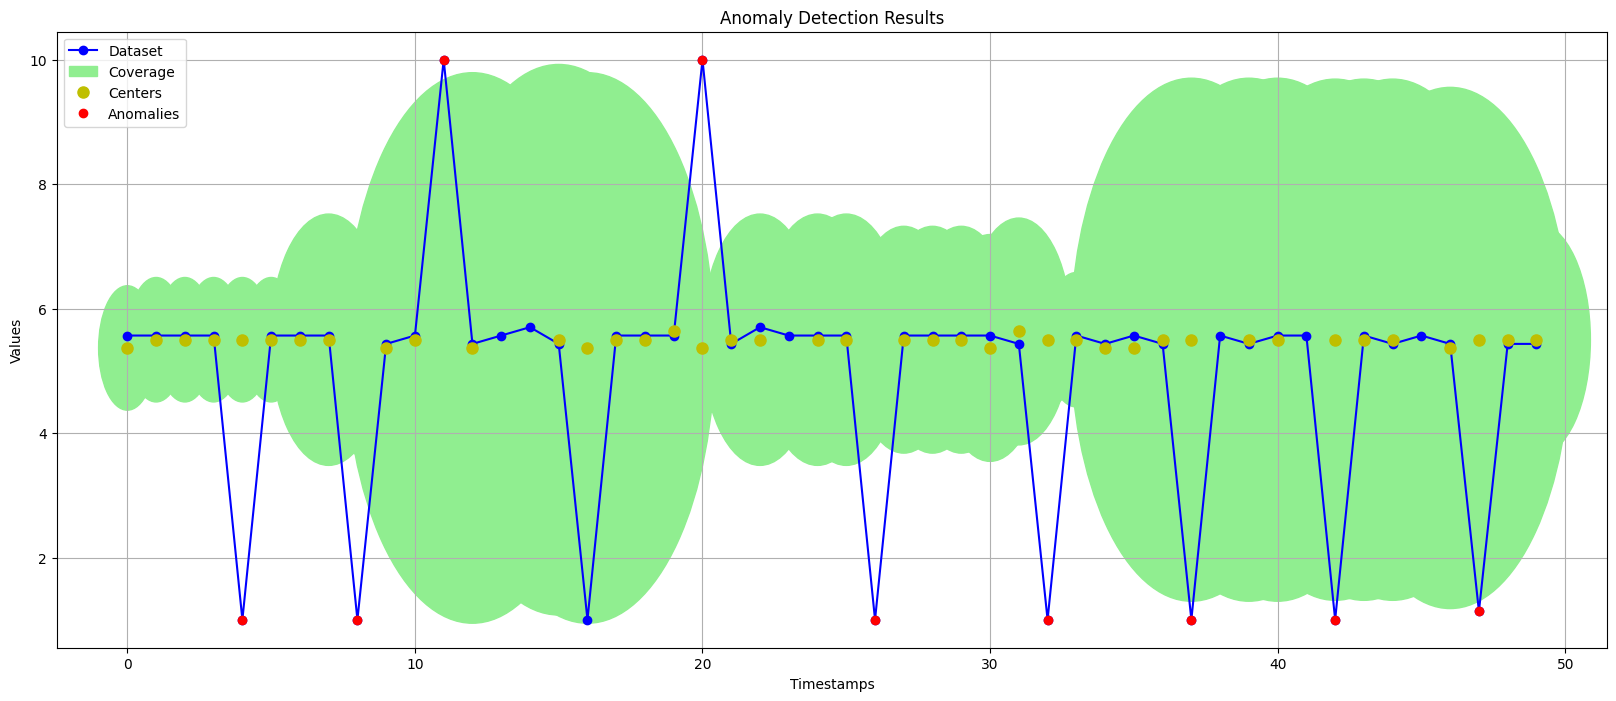

In [14]:
anomalies = detection.apply_circles_to_new_dataset(dataset_test_scaled, unique_centers_with_radii)

detection.plot_anomaly_detection_results_coverage(dataset_test_scaled, unique_centers_with_radii, anomalies, title="Anomaly Detection Results")

# detection.plot_anomaly_detection_results(dataset_test_scaled, unique_centers_with_radii, anomalies, title="Anomaly Detection Results")

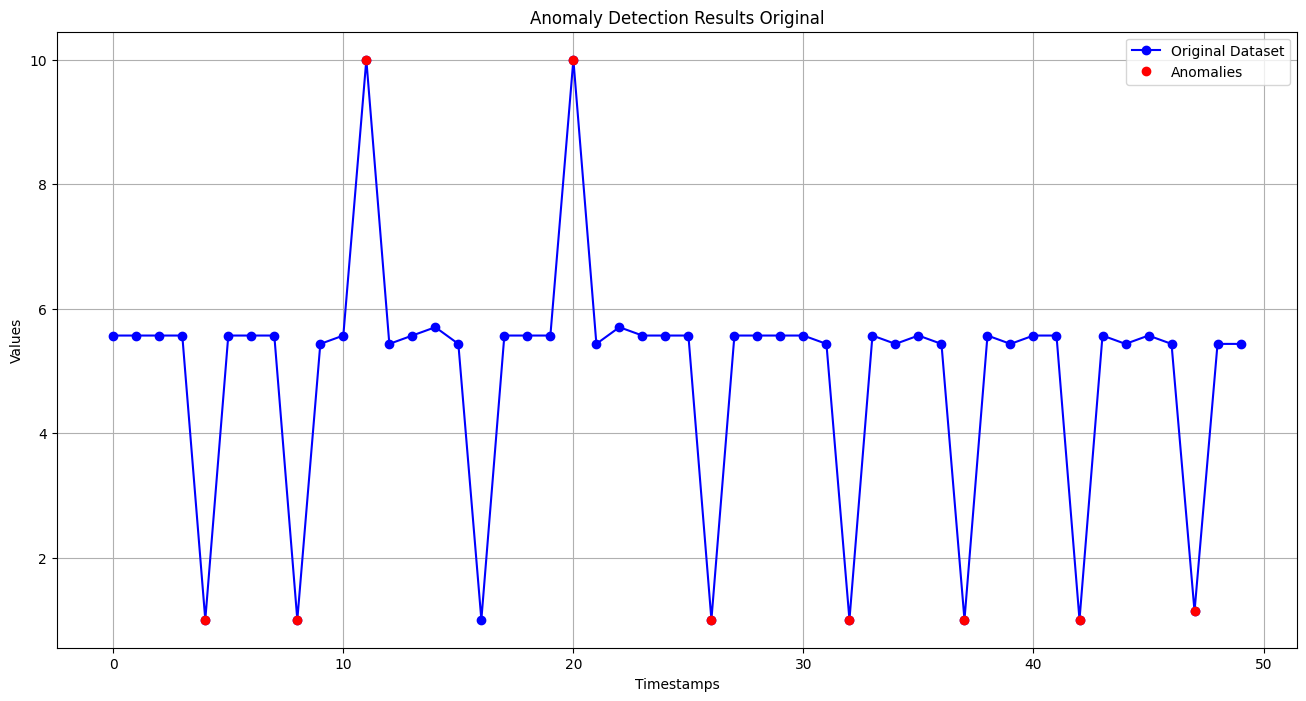

In [18]:
detection.plot_anomaly_detection_results_scaled(dataset_test_scaled, anomalies, title='Anomaly Detection Results Original')